# Project Name : - Flight Fare Prediction

### 1. Problem statement
* This dataset comprises of Flight Price taken from Kaggle
* Link of the dataset is as follows :- https://www.kaggle.com/datasets/nikhilmittal/flight-fare-prediction-mh
* A user can predict the price of the Flight Fare based on input features.
* Prediction results can be useful for traveller to get suggested price

### 2. Data Collection
* This dataset comprises of Flight Fare data taken from Kaggle
* The data consists of 11 column and 10683 rows.

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given Flight Fare data (Regression Analysis).

* There are 10 independent variables :

* Airline: The name of the airline operating the flight.

* Date_of_Journey: The date on which the journey starts.

* Source: The departure city of the flight.

* Destination: The arrival city of the flight.

* Route: The path taken by the flight from the source to the destination.
       Includes layovers if any.

* Dep_Time: The departure time of the flight.

* Arrival_Time: The arrival time of the flight.

* Duration: The total time taken by the flight from departure to arrival.

* Total_Stops: The number of stops or layovers during the journey.

* Additional_Info: Any extra information about the flight.

* Price: The cost of the flight ticket.

* Target Variable: Price: This is the variable you aim to predict or analyze.
                        It represents the cost of the flight ticket in Indian Rupees (INR).


#### 2.1. Import Data and Required Packages

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [4]:
import pandas as pd
df = pd.read_csv(r"F:\working project\Flight_Fare_Prediction\data\rawdata\flight_fare_prediction.csv")
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [3]:
df.tail(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


In [4]:
df.sample(5)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
5088,GoAir,18/04/2019,Banglore,Delhi,BLR → DEL,07:45,10:40,2h 55m,non-stop,No info,5048
4742,IndiGo,9/03/2019,Delhi,Cochin,DEL → HYD → COK,07:35,16:10,8h 35m,1 stop,No info,6674
3971,Jet Airways,9/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 10 Jun,10h 55m,1 stop,In-flight meal not included,10262
4085,Jet Airways,9/04/2019,Delhi,Cochin,DEL → BOM → COK,22:50,04:25 10 Apr,5h 35m,1 stop,No info,12242
2137,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → DEL → BLR,09:35,23:35,14h,1 stop,No info,12121


In [5]:
df.shape

(10683, 11)

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

#### 3. EXPLORING DATA

In [7]:
categorical_columns=df.columns[df.dtypes=="object"]
df[categorical_columns]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info
...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info


In [8]:
categorical_columns = ['Airline', 'Source', 'Destination']

In [9]:
for col in categorical_columns:
    print(f"Name of {col}: {df[col].unique()}")
    print("\n","____________________________________________________________")
    print("\n")


Name of Airline: ['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']

 ____________________________________________________________


Name of Source: ['Banglore' 'Kolkata' 'Delhi' 'Chennai' 'Mumbai']

 ____________________________________________________________


Name of Destination: ['New Delhi' 'Banglore' 'Cochin' 'Kolkata' 'Delhi' 'Hyderabad']

 ____________________________________________________________




#### Univariate Analysis
* The term univariate analysis refers to the analysis of one variable prefix “uni” means “one.” The purpose of univariate analysis is to understand the distribution of values for a single variable.

In [10]:
for col in categorical_columns:
    print(df[col].value_counts(normalize=True)*100)
    print('----------------------------')

Airline
Jet Airways                          36.029205
IndiGo                               19.217448
Air India                            16.399888
Multiple carriers                    11.195357
SpiceJet                              7.657025
Vistara                               4.483759
Air Asia                              2.986053
GoAir                                 1.815969
Multiple carriers Premium economy     0.121689
Jet Airways Business                  0.056164
Vistara Premium economy               0.028082
Trujet                                0.009361
Name: proportion, dtype: float64
----------------------------
Source
Delhi       42.469344
Kolkata     26.874473
Banglore    20.565384
Mumbai       6.524385
Chennai      3.566414
Name: proportion, dtype: float64
----------------------------
Destination
Cochin       42.469344
Banglore     26.874473
Delhi        11.841243
New Delhi     8.724141
Hyderabad     6.524385
Kolkata       3.566414
Name: proportion, dtype: float64
----

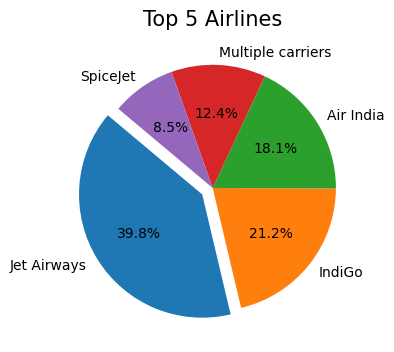

In [11]:
# Count occurrences of each airline
airline_counts = df['Airline'].value_counts()

# Select top 5 airlines
top_5_airlines = airline_counts.head(5)

explode = (0.1, 0, 0, 0, 0)  # Only "explode" the 1st slice

# Plotting
plt.figure(figsize=(8, 4))
plt.pie(top_5_airlines, labels=top_5_airlines.index, autopct='%1.1f%%', startangle=140, explode=explode)
plt.title('Top 5 Airlines', fontsize=15)
plt.show()

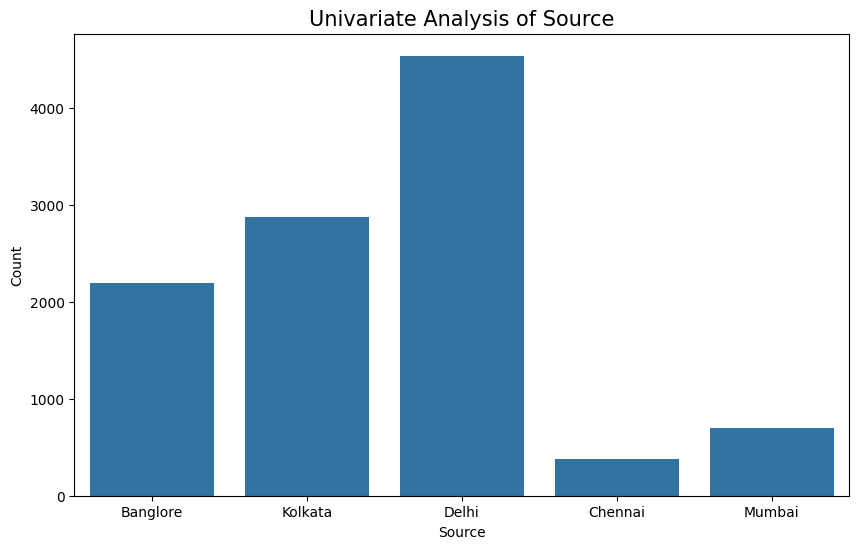

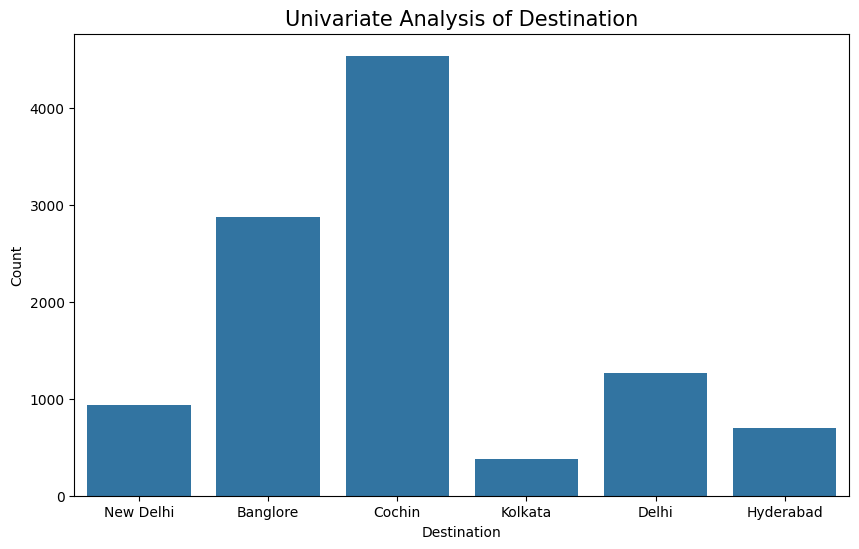

<Figure size 640x480 with 0 Axes>

In [12]:
# Define categorical features to plot
cat_features = ['Source', 'Destination']

# Number of categorical features
num_cat_features = len(cat_features)

# Loop over categorical features and create a subplot for each
for feature in cat_features:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=feature, data=df)
    plt.title(f'Univariate Analysis of {feature}', fontsize=15)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()
# Adjust layout and show plots
plt.tight_layout()

In [13]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


### Bivariate Analysis

In [14]:
df.groupby(['Airline', 'Source'])['Price'].sum()

Airline                            Source  
Air Asia                           Banglore      407111
                                   Delhi         624334
                                   Kolkata       751848
Air India                          Banglore     3067082
                                   Chennai       147391
                                   Delhi        7470051
                                   Kolkata      5302950
                                   Mumbai        851367
GoAir                              Banglore      460246
                                   Delhi         500624
                                   Kolkata       176175
IndiGo                             Banglore     2758361
                                   Chennai       835133
                                   Delhi        5078773
                                   Kolkata      2258480
                                   Mumbai        717324
Jet Airways                        Banglore     8685125
    

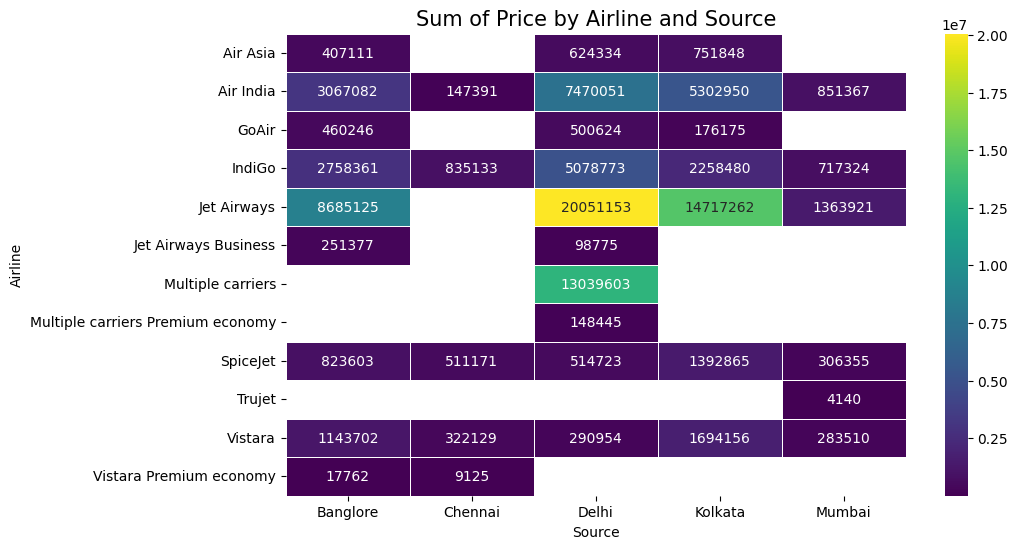

In [15]:
import seaborn as sns

# Create a pivot table with Airline as rows, Source as columns, and Price as values
pivot_data = df.pivot_table(index='Airline', columns='Source', values='Price', aggfunc='sum')

# Plotting
plt.figure(figsize=(10, 6))
sns.heatmap(pivot_data, cmap='viridis', annot=True, fmt='.0f', linewidths=.5)
plt.title('Sum of Price by Airline and Source', fontsize=15)
plt.xlabel('Source')
plt.ylabel('Airline')
plt.show()


In [16]:
categorical_features = df.select_dtypes(include='object')

In [79]:
categorical_features.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info


In [17]:
from scipy.stats import chi2_contingency

# Select categorical features
categorical_features = df.select_dtypes(include='object').columns

chi2_test = []

for feature in categorical_features:
    p_value = chi2_contingency(pd.crosstab(df['Price'], df[feature]))[1]
    
    if p_value < 0.05:
        chi2_test.append('Reject Null Hypothesis')
    else:
        chi2_test.append('Fail to Reject Null Hypothesis')

result = pd.DataFrame(data={'Column': categorical_features, 'Hypothesis Result': chi2_test})


result

,Column,Hypothesis Result
0,Airline,Reject Null Hypothesis
1,Date_of_Journey,Reject Null Hypothesis
2,Source,Reject Null Hypothesis
3,Destination,Reject Null Hypothesis
4,Route,Reject Null Hypothesis
5,Dep_Time,Reject Null Hypothesis
6,Arrival_Time,Reject Null Hypothesis
7,Duration,Reject Null Hypothesis
8,Total_Stops,Reject Null Hypothesis
9,Additional_Info,Reject Null Hypothesis


In [18]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [19]:
df.dropna(inplace=True)

In [20]:
df.isna().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

### Initial Analysis Report
##### Report

* Jet Airways has highest customer footfall followed by Indigo and Air India .
* Jet Airways has a market Share of 36.03 % followed by Indigo which has a market share of 19.22 % and Air India Which has market share of 16.40 % .
* Delhi has the highest footfall for source and Cochin has the highest footfall for Destination .

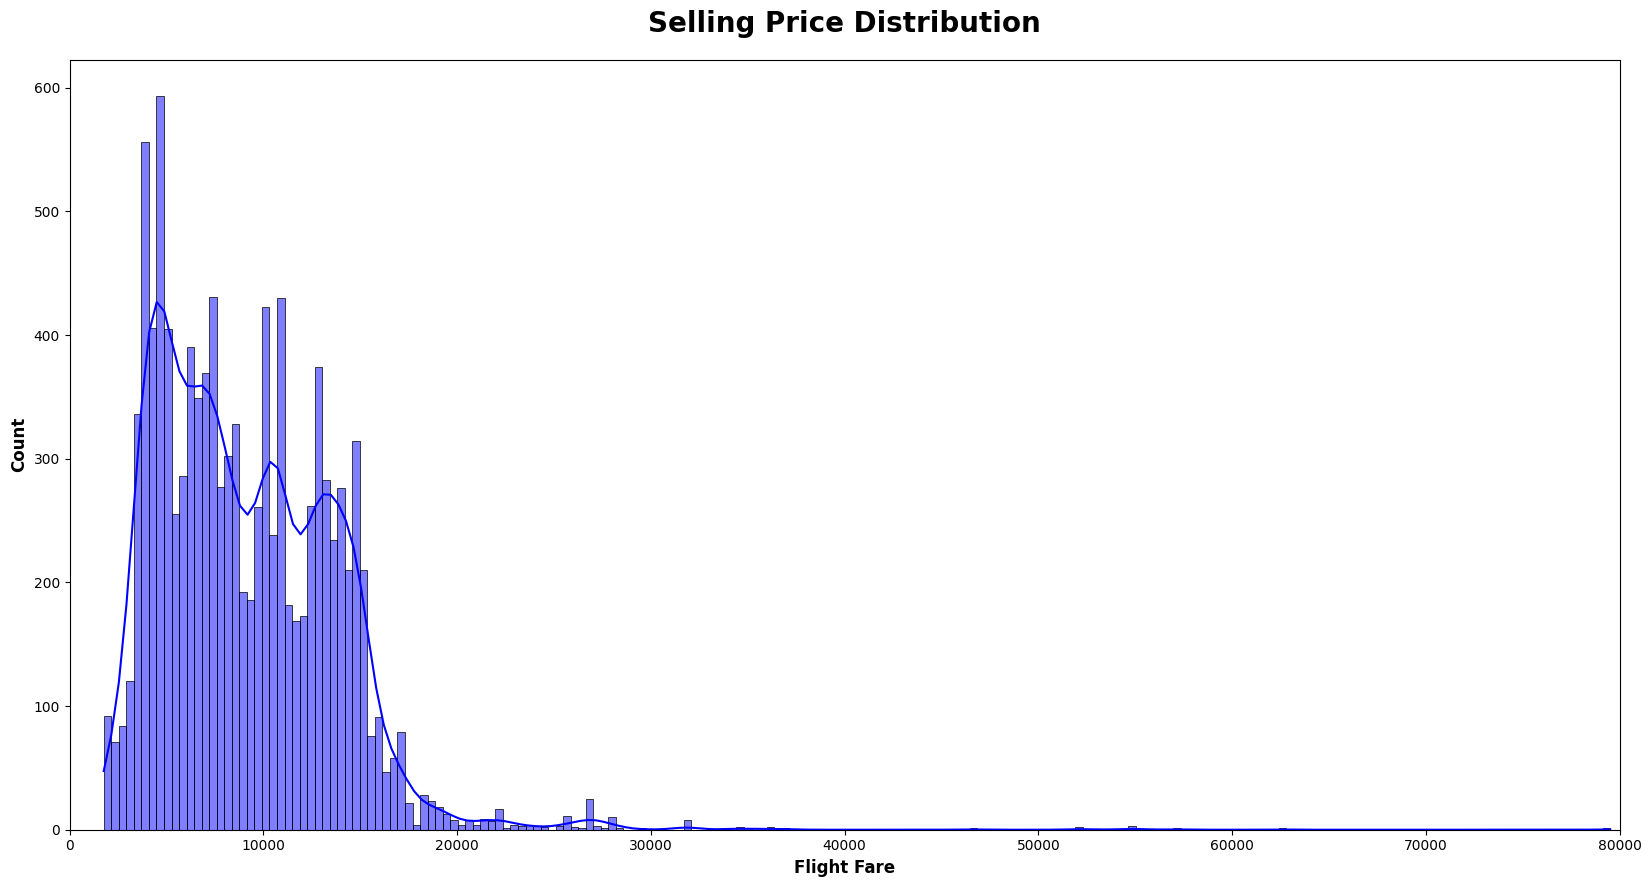

In [21]:
plt.subplots(figsize=(20,10))
sns.histplot(df.Price, bins=200, kde=True, color = 'b')
plt.title("Selling Price Distribution", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=12)
plt.xlabel("Flight Fare", weight="bold", fontsize=12)
plt.xlim(0,80000)
plt.show()

In [22]:
df.Airline.value_counts()[0:10]

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1751
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Name: count, dtype: int64

* Most Sold Tickets are of Jet Airways Airline

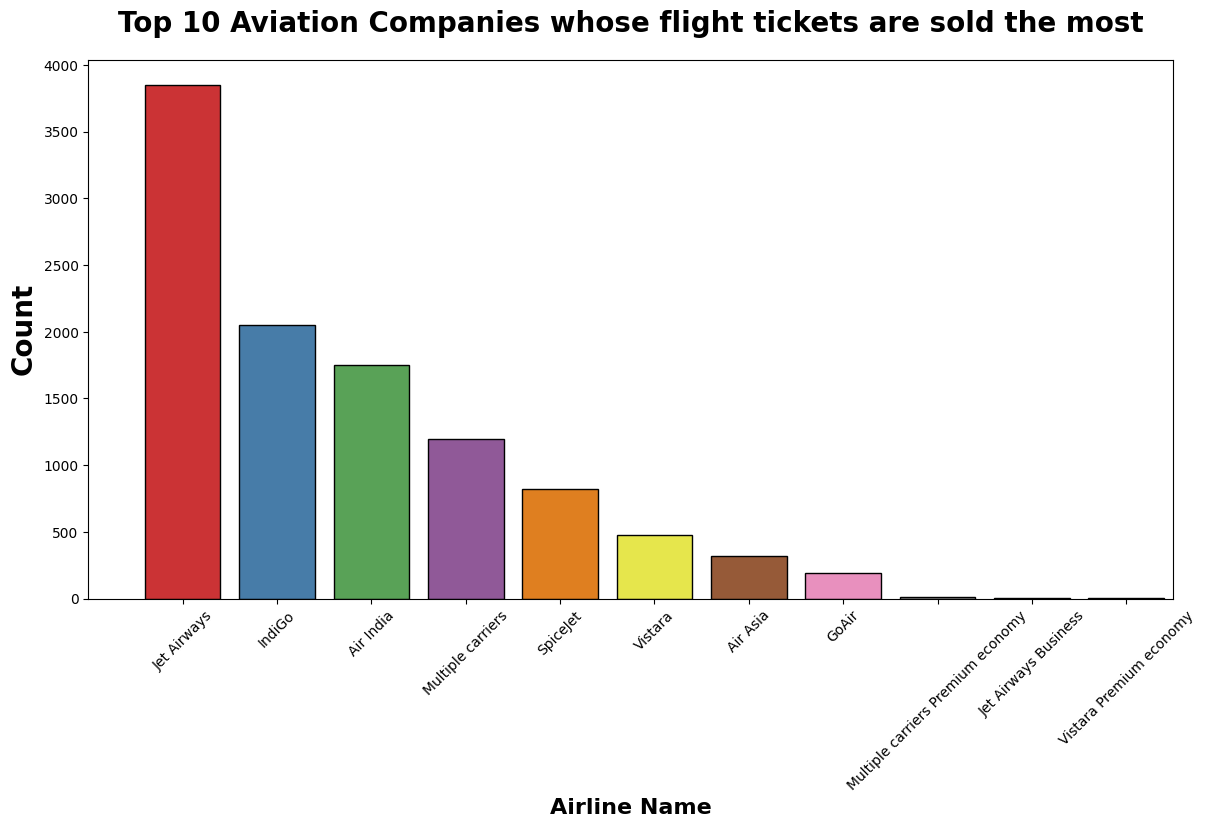

In [23]:
plt.subplots(figsize=(14,7))
sns.countplot(x="Airline", data=df,ec = "black",palette="Set1",order = df['Airline'].value_counts().index)
plt.title("Top 10 Aviation Companies whose flight tickets are sold the most", weight="bold",fontsize=20, pad=20)
plt.ylabel("Count", weight="bold", fontsize=20)
plt.xlabel("Airline Name", weight="bold", fontsize=16)
plt.xticks(rotation= 45)
plt.xlim(-1,10.5)
plt.show()

* Check mean price of Jet Airways whose flight tickets are sold the most

In [24]:
jet_airways = df[df['Airline'] == 'Jet Airways']['Price'].mean()
print(f'The mean price of Jet Airways Flight Tickets  is {jet_airways:.2f} Rupees')

The mean price of Jet Airways Flight Tickets  is 11643.92 Rupees


##### Report:

* As per the Chart these are top 10 aviation companies whose tickets are sold the most.
* Of the total flight tickets sold Jet Airways has the highest share followed by Indigo .
* Mean Price of Jet Airways Flight Ticket is Rs 11,643.92.
* This Feature has impact on the Target Variable.

## Costliest Aviation Companies and Costliest Flight Tickets

In [25]:
aviation_company_airline = df.groupby('Airline')['Price'].max() # Changed to extract 'Price' column
aviation_company = aviation_company_airline.reset_index().sort_values('Price', ascending=False).head(10) # Reset index before sorting
aviation_company


,Airline,Price
5,Jet Airways Business,79512
4,Jet Airways,54826
6,Multiple carriers,36983
1,Air India,31945
8,SpiceJet,23267
2,GoAir,22794
3,IndiGo,22153
10,Vistara,21730
7,Multiple carriers Premium economy,14629
0,Air Asia,13774


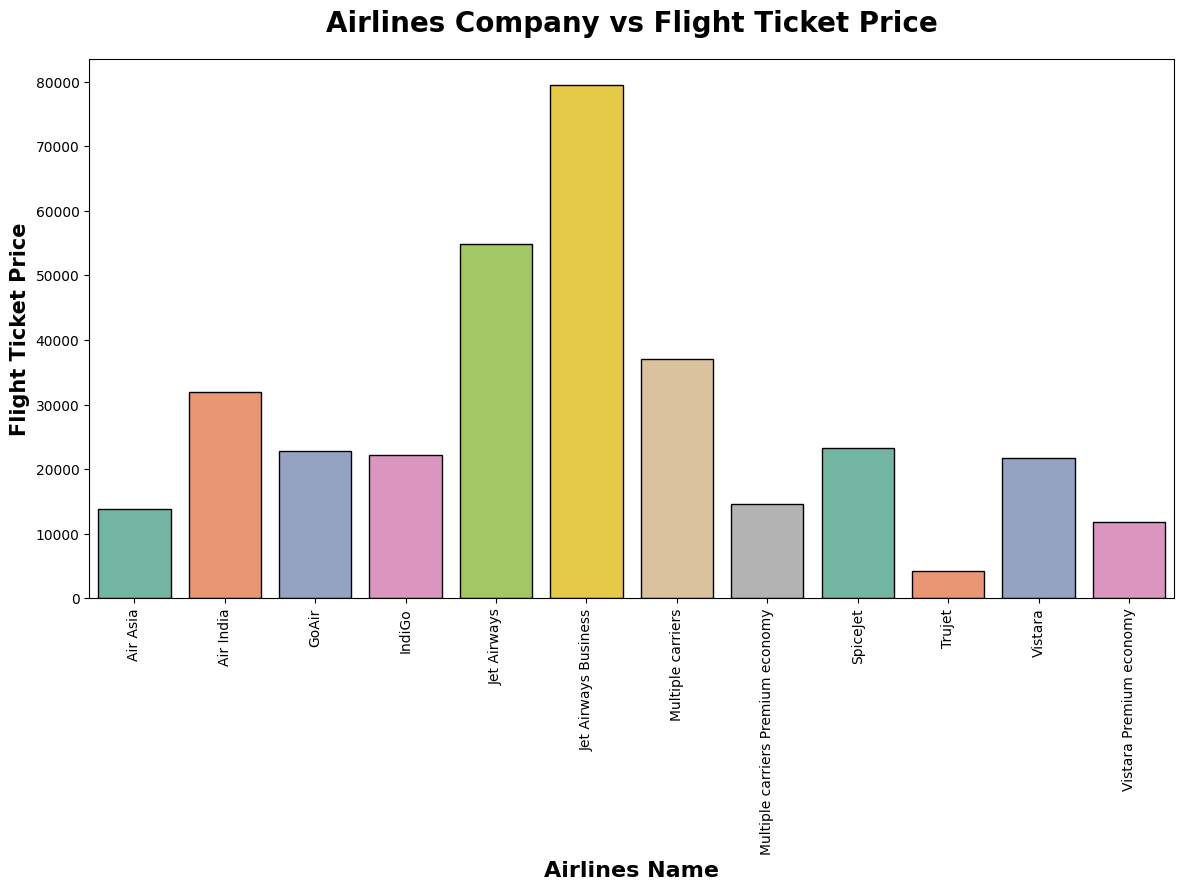

In [26]:
plt.subplots(figsize=(14,7))
sns.barplot(x=aviation_company_airline.index, y=aviation_company_airline.values,ec = "black",palette="Set2")
plt.title("Airlines Company vs Flight Ticket Price", weight="bold",fontsize=20, pad=20)
plt.ylabel("Flight Ticket Price", weight="bold", fontsize=15)
plt.xlabel("Airlines Name", weight="bold", fontsize=16)
plt.xticks(rotation=90)
plt.show()

#### Report:

* Costliest Flight Tickets Sold is of Jet Airways Business .
* Second Most Costliest Flight Tickets Sold is of Jet Airways .
* As can be seen, the airline’s name is important. The most expensive option is ‘JetAirways Business.’ The cost of other carriers varies as well.
* We’ll use one-hot encoding to handle the Airline variable because it’s Nominal Categorical Data (airline names have no order of any kind).

#### Extracting Date & Month from Date of Journey Column

##### Converting into Datetime:
* We are going to extract the date and month from the date of the journey .
* For this, we require pandas to_datetime to convert the object data type to DateTime data type .
* .dt.day the method will extract only the day from the date.
* .dt.month the method will extract only the month of that date.

In [27]:
df['Date_of_Journey'].head()

0    24/03/2019
1     1/05/2019
2     9/06/2019
3    12/05/2019
4    01/03/2019
Name: Date_of_Journey, dtype: object

### Date

In [29]:
df["journey_Date"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.day

### Months

In [30]:
df["journey_Month"]= pd.to_datetime(df['Date_of_Journey'], format= "%d/%m/%Y").dt.month

#### Checking the New Date & Month Column

In [31]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


##### Since we have extracted Date of Journey column into Date & Month, Now we can drop it as Original Date of Journey column is of no use

In [34]:
df.drop(['Date_of_Journey'],axis=1,inplace=True)

KeyError: "['Date_of_Journey'] not found in axis"

In [35]:
df.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


#### Departure time is when a plane leaves the Source .
* Similar to Date of Journey we can extract values from Departure Time
* So we will be extracting Hour & Minutes from Departure Time Column

In [36]:
# Extracting Hours
df['Dep_hour']=pd.to_datetime(df['Dep_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
df['Dep_min']=pd.to_datetime(df['Dep_Time']).dt.minute

#Now we will drop the dep_time, no use
df.drop(['Dep_Time'],axis=1,inplace=True)

#### Arrival time is when a plane reaches the destination.
* Similar to Date of Journey we can extract values from Arrival Time
* So we will be extracting Hour & Minutes from Arrival Time Column

In [37]:
# Extracting Hours
df['Arrival_hour']=pd.to_datetime(df['Arrival_Time']).dt.hour  #pd.to_datetime

#Extracting minutes
df['Arrival_min']=pd.to_datetime(df['Arrival_Time']).dt.minute

#Now we will drop the dep_time, no use
df.drop(['Arrival_Time'],axis=1,inplace=True)

### Let's look at the data

In [38]:
df.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


##### "Duration” column:
* here we are trying to extract the hours and minutes from the feature “duration”.

In [39]:
# Assigning and converting Duration column into list to extract hours ans minutes seperately
duration = list(df["Duration"])
for i in range(len(duration)):
    if len(duration[i].split()) !=2:  # Check if duration contains only hour or mins
        if "h" in duration[i]:
            duration[i] = duration[i].strip() + " 0m"   # Adds 0 minute
        else:
            duration[i] = "0h " + duration[i]           # Adds 0 hour

duration_hours = []
duration_mins = []
for i in range(len(duration)):
    duration_hours.append(int(duration[i].split(sep = "h")[0]))    # Extract hours from duration
    duration_mins.append(int(duration[i].split(sep = "m")[0].split()[-1]))   # Extracts only minutes from duration

Adding “duration_hours” and “duration_mins” list to df data frame and dropping the column “duration” from it

In [40]:
df["Duration_hours"] = duration_hours
df["Duration_mins"] = duration_mins

#we will remove the Durtaion column
df.drop(['Duration'],axis=1,inplace=True)

Handling Categorical Data:

Airline, Source, Destination, Route, Total_Stops, Additional_info are the categorical variables we have in our data.

Let’s handle each one by one.

Nominal data → are not in any order → OneHotEncoder is used in this case

Ordinal data → are in order → LabelEncoder is used in this case

Trying to find out unique values in column Airline and counts of the unique values as well.

One-hot encoding:

Another typical technique for dealing with categorical information is, one-hot encoding. It simply adds more characteristics to the categorical feature dependent on the number of unique values. Every category’s unique value will be added as a feature.

The method of constructing dummy variables is known as one-hot encoding.

Each category is represented as a single-hot vector in this encoding technique.

#### Airline vs Price

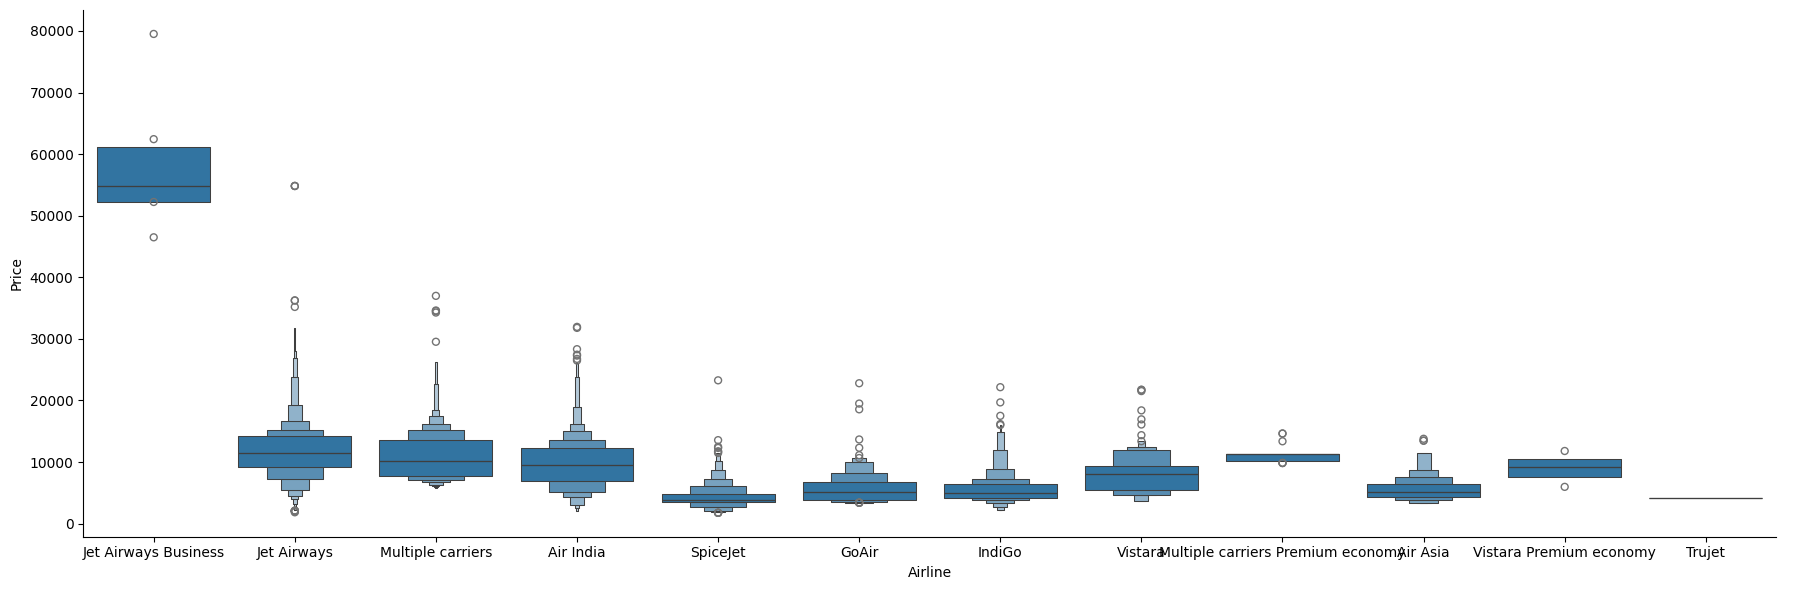

In [41]:
sns.catplot(y = "Price", x = "Airline", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()


* From the Above we can see that Jet Airways Business has premium flight fares as compared to other Airlines

In [42]:
#OneHotEncoding -----> Nominal data
Airline = df[["Airline"]]
Airline = pd.get_dummies(df['Airline'],drop_first=False)
Airline.head()

,Air Asia,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,False,False,False,True,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False
3,False,False,False,True,False,False,False,False,False,False,False,False
4,False,False,False,True,False,False,False,False,False,False,False,False


#### Source vs Destination:

* Again, the variables ‘Source’ and ‘Destination’ are Nominal Categorical Data. To deal with these two variables, we’ll employ One-Hot encoding once more.

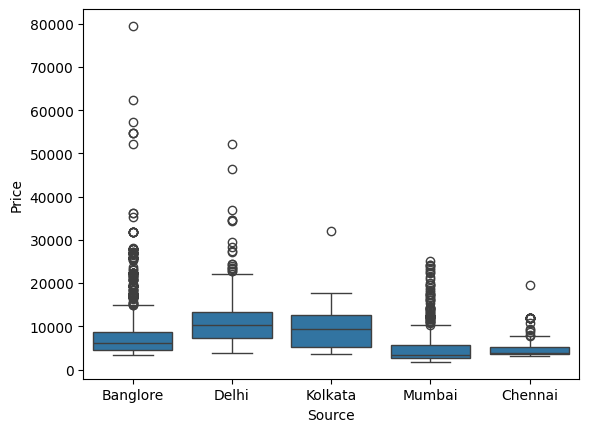

In [43]:
sns.boxplot(y = "Price", x = "Source", data = df.sort_values("Price", ascending = False))
plt.show()

* From the Above we can see that Flights Originating From Banglore has high flight fares as compared to other sources from where flights are originating

In [44]:
#OneHotEncoding -----> Nominal data
Source = df[["Source"]]
Source = pd.get_dummies(df['Source'],drop_first=True)
Source.head()

,Chennai,Delhi,Kolkata,Mumbai
0,False,False,False,False
1,False,False,True,False
2,False,True,False,False
3,False,False,True,False
4,False,False,False,False


In [45]:
# As Destination is Nominal Categorical data we will perform OneHotEncoding

Destination = df[["Destination"]]

Destination = pd.get_dummies(Destination, drop_first = True)

Destination.head()

,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,False,False,False,False,True
1,False,False,False,False,False
2,True,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,True


#### Variable route:

* The journey’s path is represented by the route variable.
* I opted to remove this field because the ‘Total Stops’ value captures whether the flight is direct or connected.

In [46]:
# droping column, because Additinal_info has since 80 % has no information 
# Route---> is related to no of stops
df.drop(["Route", "Additional_Info"], axis = 1, inplace = True)

#### Total_Stops Variable:

* Non-stop refers to a flight with no stops, i.e. a straight flight. It is self-evident that other values have the same meaning. We can see that it’s Ordinal Categorical Data, thus we’ll use LabelEncoder to deal with it.

In [47]:
df['Total_Stops'].value_counts()
# As this is case of Ordinal Categorical type we perform LabelEncoder
# we replace the values in key values 
df.replace({'non-stop':0,'1 stop':1,'2 stops':2,'3 stops':3,'4 stops':4},inplace=True)
df.head()

,Airline,Source,Destination,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


#### Correlation:

* Correlation is a technique for determining the link between two variables, which is useful in real life since it allows us to forecast the value of one variable using other factors that are connected with it. Because two variables are involved, it is a sort of bivariate statistic.

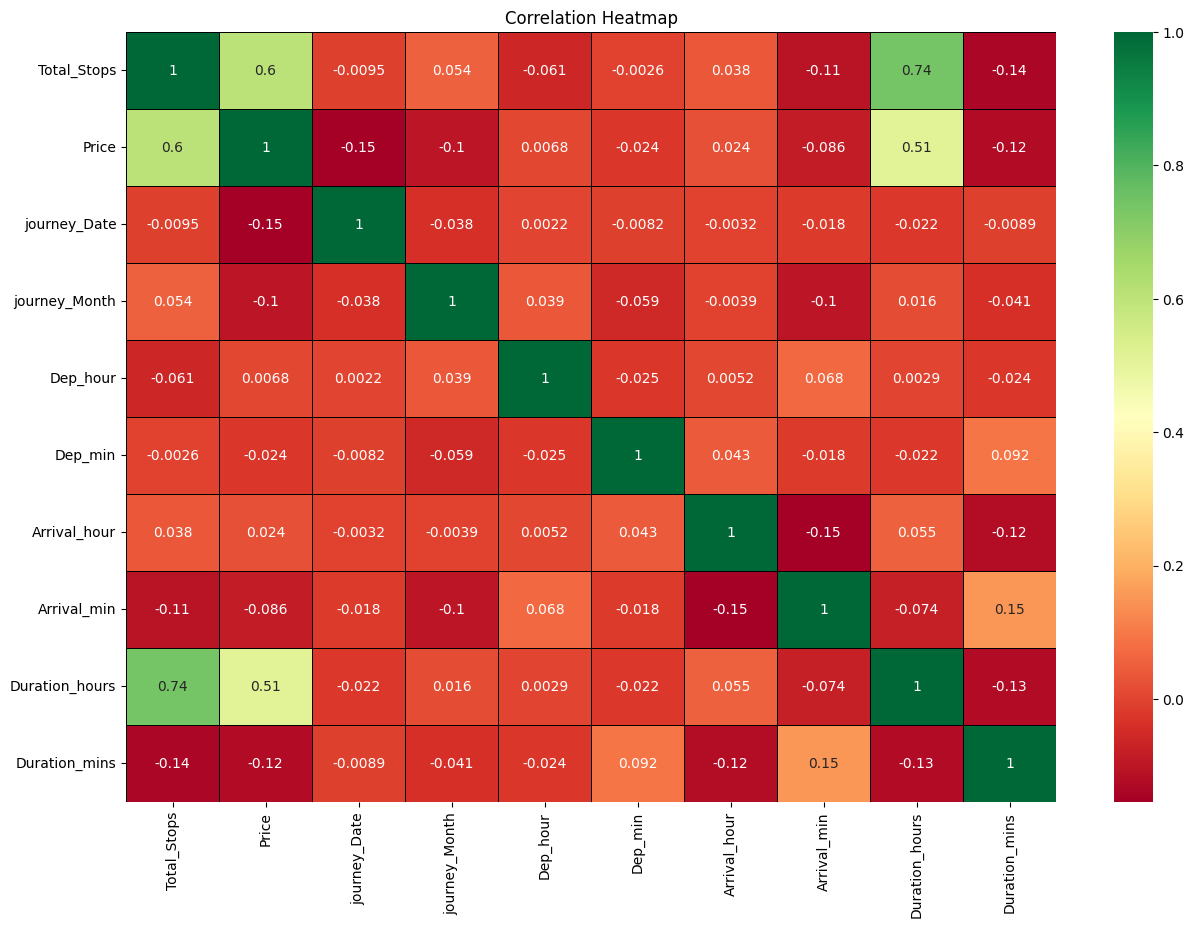

In [49]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the DataFrame to include only numeric columns
numeric_df = df.select_dtypes(include='number')

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="RdYlGn", linewidths=0.5, linecolor='black')

plt.title('Correlation Heatmap')
plt.show()


#### Final Dataframe:

* Now we’ll join all of the One-hot and Label-encoded features to the original data frame to make the final data frame. We’ll also get rid of the old variables that we used to create the new encoded variables.

In [51]:
#Concatenate dataframe --> df+ Airline + Source + Destination
data_processed=pd.concat([df,Airline , Source, Destination],axis=1)
# we have drop the varibles
data_processed.drop(["Airline","Source","Destination"],axis=1,inplace=True)
data_processed.head()

,Total_Stops,Price,journey_Date,journey_Month,Dep_hour,Dep_min,Arrival_hour,Arrival_min,Duration_hours,Duration_mins,...,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Destination_Cochin,Destination_Delhi,Destination_Hyderabad,Destination_Kolkata,Destination_New Delhi
0,0,3897,24,3,22,20,1,10,2,50,...,False,False,False,False,False,False,False,False,False,True
1,2,7662,1,5,5,50,13,15,7,25,...,False,False,False,True,False,False,False,False,False,False
2,2,13882,9,6,9,25,4,25,19,0,...,False,False,True,False,False,True,False,False,False,False
3,1,6218,12,5,18,5,23,30,5,25,...,False,False,False,True,False,False,False,False,False,False
4,1,13302,1,3,16,50,21,35,4,45,...,False,False,False,False,False,False,False,False,False,True


* As a result, the final data frame has 30 variables, including the dependent variable ‘Price.’ For training, there are only 29variables.

In [52]:
data_processed.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10682 entries, 0 to 10682
Data columns (total 31 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Total_Stops                        10682 non-null  int64
 1   Price                              10682 non-null  int64
 2   journey_Date                       10682 non-null  int32
 3   journey_Month                      10682 non-null  int32
 4   Dep_hour                           10682 non-null  int32
 5   Dep_min                            10682 non-null  int32
 6   Arrival_hour                       10682 non-null  int32
 7   Arrival_min                        10682 non-null  int32
 8   Duration_hours                     10682 non-null  int64
 9   Duration_mins                      10682 non-null  int64
 10  Air Asia                           10682 non-null  bool 
 11  Air India                          10682 non-null  bool 
 12  GoAir                  

In [59]:
import os
import pandas as pd

# Save this file to the data/processed folder
def save_data(data, file_path):
    # Create the directory if it doesn't exist
    os.makedirs(os.path.dirname(file_path), exist_ok=True)
    
    # Save the data to CSV
    data.to_csv(file_path, index=False)
    print(f"data is saved: {file_path}")


directory_path = r'F:\working project\Flight_Fare_Prediction\data\processed'
    
    # Full file path with file name
file_path = os.path.join(directory_path, 'processed_data.csv')
    
    # Save the processed data
save_data(data_processed, file_path)


data is saved: F:\working project\Flight_Fare_Prediction\data\processed\processed_data.csv
